<a href="https://colab.research.google.com/github/muratbek-kebtarum/ASDA_2025_Group_5_Portfolio/blob/main/week_03_group_5_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lego Inventory Creation Dataset
<div style="
    border: 5px solid purple;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

### Libraries Loading
<div style="
    border: 2px solid orange;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re

### Data Loading
<div style="
    border: 2px solid orange;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

In [2]:
url = "https://docs.google.com/spreadsheets/d/17o2TJJ3_pmrFsFNIdhxyPW3PFO0zyksoSVbrWzrDJoU/export?format=xlsx"
dataset = pd.ExcelFile(url, engine='openpyxl')

# Parse all sheets into a dictionary
sheets = {sheet: dataset.parse(sheet) for sheet in dataset.sheet_names}

# Merge all sheets into one DataFrame
lego_dataset = pd.concat(sheets.values(), ignore_index=True)

### Data Initial Inspection
<div style="
    border: 2px solid orange;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

In [3]:
lego_dataset.sample(20)

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock,transparent
53,NaN,yellow,no,brick,square,2*2,4,no,0.0,yes,NaN
136,NaN,cyan,0,brick,rectangle,1x4,4,0,0.0,1,0.0
144,NaN,black,0,plate,square,2x2,4,0,0.0,1,0.0
173,NaN,Grey,False,Plate,Square,2*2,4,False,0.0,1,NaN
4,NaN,White,True,Brick,Square,2 x 2,4,False,NaN,1,NaN
57,NaN,red,no,brick,rectangle,1*1,1,yes,45.0,yes,NaN
202,NaN,Transparent sky blue,False,Plate,Round,1*1,0,False,0.0,1,NaN
118,NaN,cream,no,plate,rectangle,2 X 1,2,no,0.0,1,NaN
30,NaN,Cyan,False,Plate,Rectangle,1 x 2,2,False,NaN,1,NaN
1,NaN,Green,True,Brick,Rectangle,2 x 4,8,False,NaN,1,NaN


In [4]:
# variations
lego_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               0 non-null      float64
 1   color            204 non-null    object 
 2   is duplo?        204 non-null    object 
 3   size type        204 non-null    object 
 4   base shape       204 non-null    object 
 5   base dimensions  204 non-null    object 
 6   number of studs  204 non-null    int64  
 7   has slope?       204 non-null    object 
 8   slope degree     168 non-null    float64
 9   in stock         204 non-null    object 
 10  transparent      40 non-null     float64
dtypes: float64(3), int64(1), object(7)
memory usage: 17.7+ KB


### Data Cleaning
<div style="
    border: 2px solid orange;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

In [5]:
# removing transparent column
lego_dataset = lego_dataset.drop('transparent', axis=1)
lego_dataset

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
0,NaN,Dark Blue,True,Brick,Rectangle,2 x 4,8,False,NaN,1
1,NaN,Green,True,Brick,Rectangle,2 x 4,8,False,NaN,1
2,NaN,Coral,True,Brick,Square,2 x 2,4,False,NaN,1
3,NaN,Red,True,Brick,Square,2 x 2,4,False,NaN,1
4,NaN,White,True,Brick,Square,2 x 2,4,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...
199,NaN,Transparent orange,False,Plate,Square,1*1,0,False,0.0,1
200,NaN,Blck,False,Plate,Trapezium,2*2,4,False,0.0,1
201,NaN,Yellow,False,Plate,Rectangle,1*2,0,False,0.0,1
202,NaN,Transparent sky blue,False,Plate,Round,1*1,0,False,0.0,1


In [6]:
# added Id's
lego_dataset['id'] = range(1, len(lego_dataset) + 1)
lego_dataset

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
0,1,Dark Blue,True,Brick,Rectangle,2 x 4,8,False,NaN,1
1,2,Green,True,Brick,Rectangle,2 x 4,8,False,NaN,1
2,3,Coral,True,Brick,Square,2 x 2,4,False,NaN,1
3,4,Red,True,Brick,Square,2 x 2,4,False,NaN,1
4,5,White,True,Brick,Square,2 x 2,4,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...
199,200,Transparent orange,False,Plate,Square,1*1,0,False,0.0,1
200,201,Blck,False,Plate,Trapezium,2*2,4,False,0.0,1
201,202,Yellow,False,Plate,Rectangle,1*2,0,False,0.0,1
202,203,Transparent sky blue,False,Plate,Round,1*1,0,False,0.0,1


In [7]:
# removing variations from base dimensions column using regular expression
lego_dataset["base dimensions"] = lego_dataset["base dimensions"].str.replace(r'\s*([xX\+*])\s*', '*', regex=True)
lego_dataset.sample(20)

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
125,126,red,1,brick,square,2*2,4,0,0.0,1
39,40,Bright Pink,False,Plate,Circle,1*1,1,False,NaN,1
32,33,Ice Blue,False,Brick,Rectangle,1*4,4,False,NaN,1
193,194,Brown,False,Brick,Rectangle,1*2,2,True,45.0,1
114,115,purple,no,brick,rectangle,2*1,2,no,0.0,1
74,75,neon orange,no,plate,rectangle,1*2,2,no,0.0,yes
60,61,white,no,plate,rectangle,2*8,16,no,0.0,yes
169,170,Red,False,Plate,Rectangle,4*6,24,False,0.0,1
167,168,Yellow,True,Brick,Square,2*2,4,False,0.0,1
198,199,Black,False,Brick,Round,2*2,4,False,0.0,1


In [8]:
#checking if every base dimension is like n*n
lego_dataset[~lego_dataset['base dimensions'].str.match(r'^\d+\*\d+$', na=False)]

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
28,29,Red Brown,False,Plate,Rectangle,0*0,0,False,NaN,1
29,30,Neon Yellow,False,Plate,Square,0*0,0,False,NaN,1
34,35,Shiny Green,False,Brick,Square,0*0,0,True,45.0,1
38,39,Beige,False,Plate,Circle,2*4*2*2,12,False,NaN,1


In [9]:
#cleaning invisible symbols in base dimensions like 0*0
#not deleting row with dimensions 2*4*2*2
lego_dataset['base dimensions'] = lego_dataset['base dimensions'].astype(str).str.replace(r'[^\d*]', '', regex=True)


In [10]:
lego_dataset

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
0,1,Dark Blue,True,Brick,Rectangle,2*4,8,False,NaN,1
1,2,Green,True,Brick,Rectangle,2*4,8,False,NaN,1
2,3,Coral,True,Brick,Square,2*2,4,False,NaN,1
3,4,Red,True,Brick,Square,2*2,4,False,NaN,1
4,5,White,True,Brick,Square,2*2,4,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...
199,200,Transparent orange,False,Plate,Square,1*1,0,False,0.0,1
200,201,Blck,False,Plate,Trapezium,2*2,4,False,0.0,1
201,202,Yellow,False,Plate,Rectangle,1*2,0,False,0.0,1
202,203,Transparent sky blue,False,Plate,Round,1*1,0,False,0.0,1


In [11]:
# ignore warnings
warnings.filterwarnings('ignore')

In [12]:
# Converting values
bool_map = {'true': True, 'yes': True, '1': True, 'false': False, 'no': False, '0': False}

cols = ["is duplo?", "has slope?"]
for col in cols:
    lego_dataset[col] = lego_dataset[col].astype(str).str.lower().map(bool_map)
# Slope degree
lego_dataset["slope degree"] = lego_dataset["slope degree"].replace(0, np.nan)
# In stock
lego_dataset["in stock"] = lego_dataset["in stock"].replace('yes', 1)

lego_dataset.sample(20)

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
197,198,Transparent yellow,False,Plate,Rectangle,1*2,2,False,NaN,1
192,193,Purple,False,Plate,Rectangle,1*2,2,False,NaN,1
179,180,Beige,False,Brick,Rectangle,1*3,3,False,NaN,1
93,94,bright green,False,brick,rectangle,3*2,6,False,NaN,1
11,12,Dark Blue,False,Brick,Rectangle,2*6,12,False,NaN,1
172,173,White,False,Plate,Rectangle,2*4,8,False,NaN,1
92,93,pear,False,plate,rectangle,2*1,2,False,NaN,1
103,104,yellow,False,brick,rectangle,2*1,2,False,NaN,1
26,27,Dark Blue,False,Brick,Square,1*2,2,True,45.0,1
1,2,Green,True,Brick,Rectangle,2*4,8,False,NaN,1


In [13]:
# removed white spaces in color column => to avoid same names but in multiple formate
lego_dataset['color'] = (
    lego_dataset['color']
    .str.lower()
    .str.replace(' ', '', regex=False)
    .str.replace('-', '', regex=False)
)
# lower case
columns = ["size type", "base shape"]
for col in columns:
    lego_dataset[col] = lego_dataset[col].str.lower()


lego_dataset.sample(20)

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
100,101,skyblue,False,brick,rectangle,2*1,1,True,45.0,1
8,9,orange,False,plate,rectangle,1*4,4,False,NaN,1
20,21,darkgreen,False,plate,rectangle,2*4,8,False,NaN,1
58,59,lightpurple,False,brick,square,1*1,1,False,NaN,1
13,14,red,False,plate,square,2*2,4,False,NaN,1
75,76,neondarkyellow,False,plate,circle,1*1,1,False,NaN,1
96,97,blue,False,plate,rectangle,4*2,8,False,NaN,1
22,23,red,False,brick,circle,2*2,4,False,NaN,1
147,148,blue,False,plate,trapezoid,2*2,4,False,NaN,1
92,93,pear,False,plate,rectangle,2*1,2,False,NaN,1


In [14]:
# check duplicates
columns_to_check = [col for col in lego_dataset.columns if col != 'id']
duplicates = lego_dataset.duplicated(subset=columns_to_check, keep=False)
print("\nDuplicate rows (excluding id):")
print(lego_dataset[duplicates])


Duplicate rows (excluding id):
      id     color  is duplo? size type base shape base dimensions  \
0      1  darkblue       True     brick  rectangle             2*4   
1      2     green       True     brick  rectangle             2*4   
3      4       red       True     brick     square             2*2   
9     10    yellow      False     brick  rectangle             2*4   
11    12  darkblue      False     brick  rectangle             2*6   
22    23       red      False     brick     circle             2*2   
24    25     black      False     plate     square             1*2   
45    46       red       True     brick  rectangle             2*4   
46    47    yellow       True     brick     square             2*2   
47    48  darkblue       True     brick  rectangle             2*4   
48    49  darkblue      False     brick  rectangle             2*6   
65    66     black      False     plate     square             1*2   
86    87      blue       True     brick     square        

In [15]:
# removing duplicates
def clean_duplicates_exclude_slope(df, id_column='id', stock_column='in stock'):
    # Columns for grouping
    group_cols = [col for col in df.columns if col not in [id_column, stock_column, 'slope degree']]

    # Group and aggregate
    cleaned_df = df.groupby(group_cols, as_index=False).agg({
        id_column: 'first',
        stock_column: 'sum',
        'slope degree': 'first'
    })

    # Reorder columns to match original order
    cleaned_df = cleaned_df[df.columns]

    # Sort by original ID
    cleaned_df = cleaned_df.sort_values(id_column).reset_index(drop=True)

    print(f"Cleaned: {len(df)} → {len(cleaned_df)} rows, Stock: {df[stock_column].sum()} → {cleaned_df[stock_column].sum()}")

    return cleaned_df

# Usage
df = clean_duplicates_exclude_slope(lego_dataset, 'id', 'in stock')

Cleaned: 204 → 189 rows, Stock: 204 → 204


In [16]:
df['id'] = range(1, len(df) + 1)
df

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
0,1,darkblue,True,brick,rectangle,2*4,8,False,NaN,2
1,2,green,True,brick,rectangle,2*4,8,False,NaN,3
2,3,coral,True,brick,square,2*2,4,False,NaN,1
3,4,red,True,brick,square,2*2,4,False,NaN,2
4,5,white,True,brick,square,2*2,4,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...
184,185,transparentorange,False,plate,square,1*1,0,False,NaN,1
185,186,blck,False,plate,trapezium,2*2,4,False,NaN,1
186,187,yellow,False,plate,rectangle,1*2,0,False,NaN,1
187,188,transparentskyblue,False,plate,round,1*1,0,False,NaN,1


### Data Final Inspection
<div style="
    border: 2px solid orange;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

In [17]:
df.head(10)

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
0,1,darkblue,True,brick,rectangle,2*4,8,False,NaN,2
1,2,green,True,brick,rectangle,2*4,8,False,NaN,3
2,3,coral,True,brick,square,2*2,4,False,NaN,1
3,4,red,True,brick,square,2*2,4,False,NaN,2
4,5,white,True,brick,square,2*2,4,False,NaN,1
5,6,green,True,plate,rectangle,2*4,8,False,NaN,1
6,7,lightgreen,True,plate,rectangle,2*8,16,False,NaN,1
7,8,orange,False,brick,square,2*2,4,False,NaN,1
8,9,orange,False,plate,rectangle,1*4,4,False,NaN,1
9,10,yellow,False,brick,rectangle,2*4,8,False,NaN,2


In [18]:
# exporting cleaned dataset
df.to_excel("../additional_material/LegoDatabase_without_duplicates.xlsx", index=False)

In [19]:
# shape (rows, columns)
df.shape
print(f"Dataset consist of {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset consist of 189 rows and 10 columns.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               189 non-null    int64  
 1   color            189 non-null    object 
 2   is duplo?        189 non-null    bool   
 3   size type        189 non-null    object 
 4   base shape       189 non-null    object 
 5   base dimensions  189 non-null    object 
 6   number of studs  189 non-null    int64  
 7   has slope?       189 non-null    bool   
 8   slope degree     24 non-null     float64
 9   in stock         189 non-null    int64  
dtypes: bool(2), float64(1), int64(3), object(4)
memory usage: 12.3+ KB


In [21]:
# unique values
df.nunique()

,0
id,189
color,63
is duplo?,2
size type,3
base shape,8
base dimensions,21
number of studs,10
has slope?,2
slope degree,3
in stock,3


### Discriptive Statistics
<div style="
    border: 2px solid orange;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

In [22]:
# Numeric Columns
desc_stats = df[['number of studs', 'slope degree', 'in stock']].describe().T.round(2)
desc_stats

,count,mean,std,min,25%,50%,75%,max
number of studs,189.0,4.80,5.09,0.0,2.0,4.0,6.0,24.0
slope degree,24.0,43.12,6.73,15.0,45.0,45.0,45.0,45.0
in stock,189.0,1.08,0.31,1.0,1.0,1.0,1.0,3.0


In [23]:
df.sample(20)

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
135,136,pink,False,plate,rectangle,4*6,24,False,NaN,1
113,114,orange,False,brick,square,1*1,1,False,NaN,1
44,45,lightpink,True,brick,square,2*2,4,False,NaN,1
10,11,yellow,False,brick,rectangle,1*3,3,False,NaN,1
61,62,mudbrown,False,plate,rectangle,1*4,4,False,NaN,1
33,34,capri,False,brick,rectangle,1*2,2,False,NaN,1
35,36,olivegreen,False,plate,rectangle,1*2,2,False,NaN,1
36,37,beige,False,plate,trapezium,2*2,4,False,NaN,1
22,23,red,False,brick,circle,2*2,4,False,NaN,2
39,40,brightpink,False,plate,circle,1*1,1,False,NaN,1


In [30]:
# getting statistics on categorical/object columns

obj_cols = df.select_dtypes(include='object').columns

#creating table for results

obj_stats = pd.DataFrame(index=[
    'Count',
    'Number of unique values',
    'Most frequent value',
    'Most frequent value (frequency)',
    'Least frequent value',
    'Least frequent value (frequency)'
])

# making data for the table

for col in obj_cols:
    counts = df[col].value_counts(dropna=False)

    if counts.empty:
        obj_stats[col] = [0, 0, None, 0, None, 0]
        continue

    max_freq = counts.max()
    min_freq = counts.min()

    most_frequent = counts[counts == max_freq].index.tolist()
    least_frequent = counts[counts == min_freq].index.tolist()

    obj_stats[col] = [
        df[col].count(),
        df[col].nunique(dropna=False),
        ', '.join(map(str, most_frequent)),  # все значения с одинаковой макс. частотой
        max_freq,
        ', '.join(map(str, least_frequent)), # все значения с одинаковой мин. частотой
        min_freq
    ]

display(
    obj_stats.style
        .set_caption("Object columns — descriptive statistics")
        .format(lambda x: str(x)[:30] + " (truncated)" if isinstance(x, str) and len(x) > 20 else x)
)




,color,size type,base shape,base dimensions
Count,189,189,189,189
Number of unique values,63,3,8,21
Most frequent value,yellow,plate,rectangle,2*2
Most frequent value (frequency),14,100,101,41
Least frequent value,"lightgrey, brightpink, transpa (truncated)",tile,wadge,"2*4*2*2, 6*2, 6*4, 3*1 (truncated)"
Least frequent value (frequency),1,4,1,1


### Exploratory Plots
<div style="
    border: 2px solid orange;
    border-radius: 8px;
    padding: 0px;
    margin: 10px 0;
    background-color: inherit;
    color: inherit;
">
</div>

<Axes: xlabel='color'>

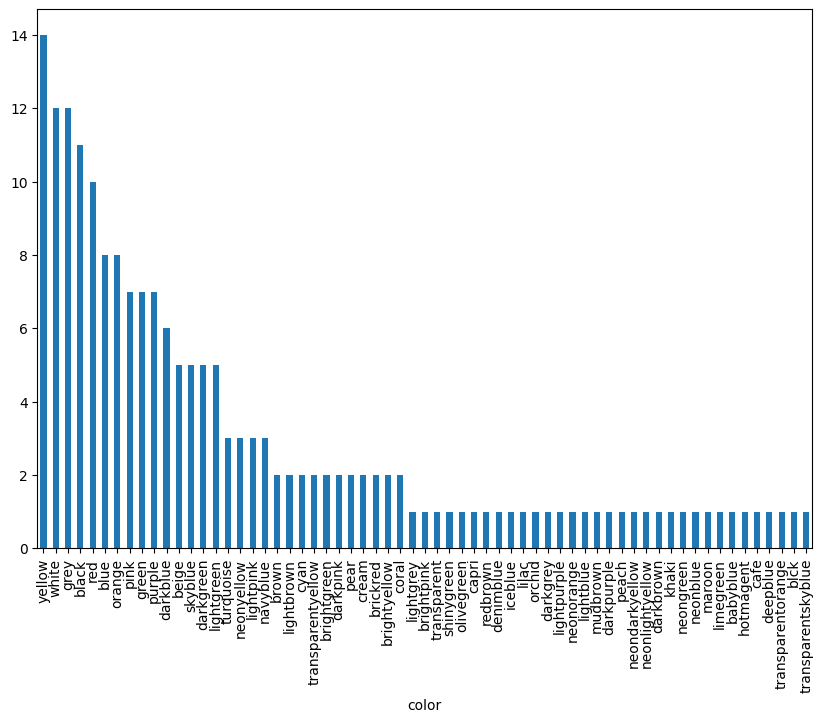

In [25]:
# which color are most common
df['color'].value_counts().plot(kind='bar', figsize=(10,7))

<Axes: xlabel='size type'>

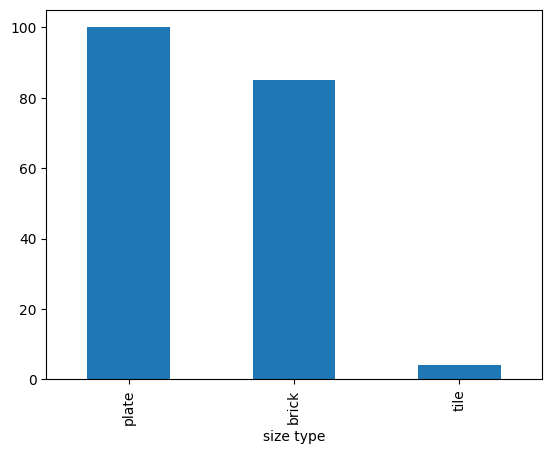

In [26]:
# Compare how many pieces belong to each size type
df['size type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='base shape'>

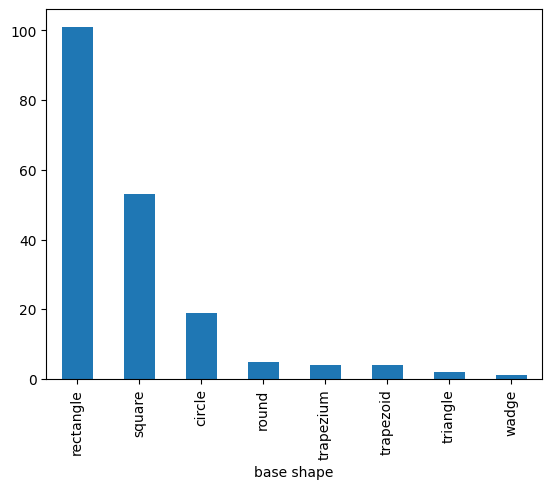

In [27]:
# Analyze which base shape appears most often
df['base shape'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

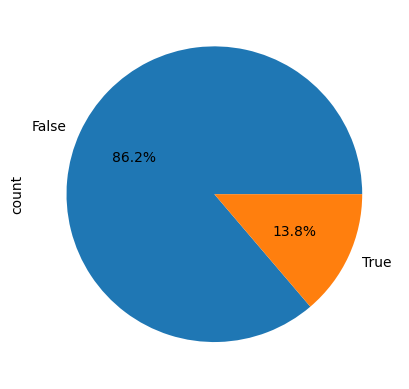

In [28]:
# Show proportion of Duplo vs regular LEGO parts
df['is duplo?'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [29]:
df.head()

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
0,1,darkblue,True,brick,rectangle,2*4,8,False,NaN,2
1,2,green,True,brick,rectangle,2*4,8,False,NaN,3
2,3,coral,True,brick,square,2*2,4,False,NaN,1
3,4,red,True,brick,square,2*2,4,False,NaN,2
4,5,white,True,brick,square,2*2,4,False,NaN,1
